In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import statistics
from scipy.optimize import curve_fit
import math 
from scipy.stats import binom
import seaborn as sns
from scipy import stats
import matplotlib.patches as mpatches
from scipy.stats import beta
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


In [3]:
df = pd.read_csv (r'/home/emonroe/Downloads/20210531_toEM/behavior_csv/senor_clean_contingencies_only_parsed_data.csv')

In [4]:
df['day']= df['date'].ne(df['date'].shift()).cumsum()
#df['diff_cont'] = df.groupby(['day','session'],group_keys=True)['contingency']
df['diff_cont'] = df['contingency'].ne(df['contingency'].shift())


df['cont_num'] = df.groupby(['day','session'])['diff_cont'].cumsum()
del df['diff_cont']
df['new_cont'] = df['cont_num'].ne(df['cont_num'].shift()).cumsum() #count from 1:222 for senor, eevry contingency numbered incremet

df['day_chng'] = df['day'].ne(df['day'].shift()) #T/F , first trial of new day T
df['stem_switch'] = df['stem'].ne(df['stem'].shift()) #T/F when he switches stems 
for ix in range(len(df)):
    if df.loc[ix,'trial']==0:
        df.loc[ix,'stem_switch']= True
df['bout_num'] = df['stem'].ne(df['stem'].shift()).cumsum() #incremnts each bout 



# df["stemChange"] = (df["stem"].shift(1, fill_value=df["stem"].head(1)) != df["stem"]).astype(int) #better way to calc?
for ix in range(len(df)): #find the global nominal average 
    cont= str(df.loc[ix, 'contingency'])
    cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
    cont = [int(i) for i in cont]
    df.loc[ix, 'glob_nom_avg'] = statistics.mean(cont)
#     for counter in range(6):
#         df.loc[ix,f'leaf{counter+1}'] = cont[counter]
df['sess_chng'] = df['session'].ne(df['session'].shift()).cumsum()
obj = ['day', 'session', 'stem']

df['rew_count_session'] = df.groupby(obj)[['reward']].cumsum()
# obj1 = ['day', 'session', 'stem','cont_num']
# df[]
df[0:5]

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,new_cont,day_chng,stem_switch,bout_num,glob_nom_avg,sess_chng,rew_count_session
0,0,4,B,1,805020202050,20201028,1,0,1,1,1,True,True,1,40.0,1,1
1,1,1,A,0,805020202050,20201028,1,1,1,1,1,False,True,2,40.0,1,0
2,2,2,A,0,805020202050,20201028,1,2,1,1,1,False,False,2,40.0,1,0
3,3,3,B,1,805020202050,20201028,1,3,1,1,1,False,True,3,40.0,1,2
4,4,4,B,0,805020202050,20201028,1,4,1,1,1,False,False,3,40.0,1,2


In [6]:
#at every stem switch, does the rat go to the stem with the highest mean? 
#at every stem switch ,does the rat go to the stem with the highest variance? 
#at the end of the contingency, which stem has the highest variance? Is it the one with the lowest nominal average or experienced beta mean? 
#what would be nice would be to have the mean and variance for every stem for every trial. 
#should start by having 2 columns: number visits A (cumsum), number rewards A. (then num failures is number visits-number rew.)

In [5]:
df.loc[df.stem == "A", "ChooseA"] = 1
df.loc[df.stem == "B", "ChooseB"] = 1
df.loc[df.stem == "C", "ChooseC"] = 1
df['ChooseA'] = df['ChooseA'].fillna(0)
df['ChooseB'] = df['ChooseB'].fillna(0)
df['ChooseC'] = df['ChooseC'].fillna(0)

In [6]:
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,new_cont,day_chng,stem_switch,bout_num,glob_nom_avg,sess_chng,rew_count_session,ChooseA,ChooseB,ChooseC
0,0,4,B,1,805020202050,20201028,1,0,1,1,1,True,True,1,40.0,1,1,0.0,1.0,0.0
1,1,1,A,0,805020202050,20201028,1,1,1,1,1,False,True,2,40.0,1,0,1.0,0.0,0.0
2,2,2,A,0,805020202050,20201028,1,2,1,1,1,False,False,2,40.0,1,0,1.0,0.0,0.0
3,3,3,B,1,805020202050,20201028,1,3,1,1,1,False,True,3,40.0,1,2,0.0,1.0,0.0
4,4,4,B,0,805020202050,20201028,1,4,1,1,1,False,False,3,40.0,1,2,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,222,False,False,814,45.0,74,28,1.0,0.0,0.0
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,222,False,False,814,45.0,74,28,1.0,0.0,0.0
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,222,False,False,814,45.0,74,28,1.0,0.0,0.0
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,222,False,False,814,45.0,74,29,1.0,0.0,0.0


In [7]:
#cumsum of number of visits to each stem throughout each session 
df['visitsA_sesh'] = df.groupby(['day','session'])[['ChooseA']].cumsum()
df['visitsB_sesh'] = df.groupby(['day','session'])[['ChooseB']].cumsum()
df['visitsC_sesh'] = df.groupby(['day','session'])[['ChooseC']].cumsum()

In [8]:
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,bout_num,glob_nom_avg,sess_chng,rew_count_session,ChooseA,ChooseB,ChooseC,visitsA_sesh,visitsB_sesh,visitsC_sesh
0,0,4,B,1,805020202050,20201028,1,0,1,1,...,1,40.0,1,1,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1,A,0,805020202050,20201028,1,1,1,1,...,2,40.0,1,0,1.0,0.0,0.0,1.0,1.0,0.0
2,2,2,A,0,805020202050,20201028,1,2,1,1,...,2,40.0,1,0,1.0,0.0,0.0,2.0,1.0,0.0
3,3,3,B,1,805020202050,20201028,1,3,1,1,...,3,40.0,1,2,0.0,1.0,0.0,2.0,2.0,0.0
4,4,4,B,0,805020202050,20201028,1,4,1,1,...,3,40.0,1,2,0.0,1.0,0.0,2.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,...,814,45.0,74,28,1.0,0.0,0.0,46.0,71.0,59.0
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,...,814,45.0,74,28,1.0,0.0,0.0,47.0,71.0,59.0
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,...,814,45.0,74,28,1.0,0.0,0.0,48.0,71.0,59.0
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,...,814,45.0,74,29,1.0,0.0,0.0,49.0,71.0,59.0


In [9]:
#cumsum of number of rewards throughout each session, nans when hes not at eah stem.  
df['rew_a']= df[df['ChooseA']==1]['rew_count_session']
df['rew_b']= df[df['ChooseB']==1]['rew_count_session']
df['rew_c']= df[df['ChooseC']==1]['rew_count_session']
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,rew_count_session,ChooseA,ChooseB,ChooseC,visitsA_sesh,visitsB_sesh,visitsC_sesh,rew_a,rew_b,rew_c
0,0,4,B,1,805020202050,20201028,1,0,1,1,...,1,0.0,1.0,0.0,0.0,1.0,0.0,NaN,1.0,NaN
1,1,1,A,0,805020202050,20201028,1,1,1,1,...,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN
2,2,2,A,0,805020202050,20201028,1,2,1,1,...,0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,NaN,NaN
3,3,3,B,1,805020202050,20201028,1,3,1,1,...,2,0.0,1.0,0.0,2.0,2.0,0.0,NaN,2.0,NaN
4,4,4,B,0,805020202050,20201028,1,4,1,1,...,2,0.0,1.0,0.0,2.0,3.0,0.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,...,28,1.0,0.0,0.0,46.0,71.0,59.0,28.0,NaN,NaN
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,...,28,1.0,0.0,0.0,47.0,71.0,59.0,28.0,NaN,NaN
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,...,28,1.0,0.0,0.0,48.0,71.0,59.0,28.0,NaN,NaN
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,...,29,1.0,0.0,0.0,49.0,71.0,59.0,29.0,NaN,NaN


In [10]:
#making sure that the stems he visits on the first trial are 0 so that rew count resets at contingency, not at first visit to stem in the contingency 
#if trial == 0 and chooseA is 0, rew_a ==0 

for ix in range(len(df)):
    if df.loc[ix,'trial']==0:
        if df.loc[ix,'ChooseA']==0:
            df.loc[ix,'rew_a'] =0
for ix in range(len(df)):
    if df.loc[ix,'trial']==0:
        if df.loc[ix,'ChooseC']==0:
            df.loc[ix,'rew_c'] =0
for ix in range(len(df)):
    if df.loc[ix,'trial']==0:
        if df.loc[ix,'ChooseB']==0:
            df.loc[ix,'rew_b'] =0            
# for ix in range(len(df)):
#     if df.loc[ix,'ChooseA']==0:
#         df.loc[ix,'rew_a'] =0        

In [11]:
#forward fill the values to take ut all the nans. 
for col in ['rew_a','rew_b','rew_c']:
    df[col] = df[col].fillna(method='ffill')
    #doesn't reset at sessions. fixed with above cell!


In [12]:
df[175*2:185*2]
# df[0:5].varA

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,rew_count_session,ChooseA,ChooseB,ChooseC,visitsA_sesh,visitsB_sesh,visitsC_sesh,rew_a,rew_b,rew_c
350,350,4,B,0,205080502020,20201028,2,170,1,3,...,37,0.0,1.0,0.0,73.0,64.0,34.0,28.0,37.0,16.0
351,351,3,B,0,205080502020,20201028,2,171,1,3,...,37,0.0,1.0,0.0,73.0,65.0,34.0,28.0,37.0,16.0
352,352,4,B,0,205080502020,20201028,2,172,1,3,...,37,0.0,1.0,0.0,73.0,66.0,34.0,28.0,37.0,16.0
353,353,5,C,1,205080502020,20201028,2,173,1,3,...,17,0.0,0.0,1.0,73.0,66.0,35.0,28.0,37.0,17.0
354,354,6,C,0,205080502020,20201028,2,174,1,3,...,17,0.0,0.0,1.0,73.0,66.0,36.0,28.0,37.0,17.0
355,355,5,C,0,205080502020,20201028,2,175,1,3,...,17,0.0,0.0,1.0,73.0,66.0,37.0,28.0,37.0,17.0
356,356,6,C,0,205080502020,20201028,2,176,1,3,...,17,0.0,0.0,1.0,73.0,66.0,38.0,28.0,37.0,17.0
357,357,5,C,0,205080502020,20201028,2,177,1,3,...,17,0.0,0.0,1.0,73.0,66.0,39.0,28.0,37.0,17.0
358,358,6,C,0,205080502020,20201028,2,178,1,3,...,17,0.0,0.0,1.0,73.0,66.0,40.0,28.0,37.0,17.0
359,359,1,A,1,205080502020,20201028,2,179,1,3,...,29,1.0,0.0,0.0,74.0,66.0,40.0,29.0,37.0,17.0


In [13]:
#calc the beta dist metrics for every single trial. Takes a bit to run, inefficient. 
for ix in range(len(df)):
    num_succ_a = df.loc[ix,'rew_a']
    num_fail_a = df.loc[ix,'visitsA_sesh'] - num_succ_a
    num_succ_b = df.loc[ix,'rew_b']
    num_fail_b = df.loc[ix,'visitsB_sesh'] - num_succ_b
    num_succ_c = df.loc[ix,'rew_c']
    num_fail_c = df.loc[ix,'visitsC_sesh'] - num_succ_c
    meana, vara, skewa, kurta = beta.stats(num_succ_a+1, num_fail_a+1, moments='mvsk')
    meanb, varb, skewb, kurtb = beta.stats(num_succ_b+1, num_fail_b+1, moments='mvsk')
    meanc, varc, skewc, kurtc = beta.stats(num_succ_c+1, num_fail_c+1, moments='mvsk')
    df.loc[ix,'meanA'] = meana
    df.loc[ix,'varA'] = vara
    df.loc[ix,'meanB'] = meanb
    df.loc[ix,'varB'] = varb
    df.loc[ix,'meanC'] = meanc
    df.loc[ix,'varC'] = varc

In [16]:
# df

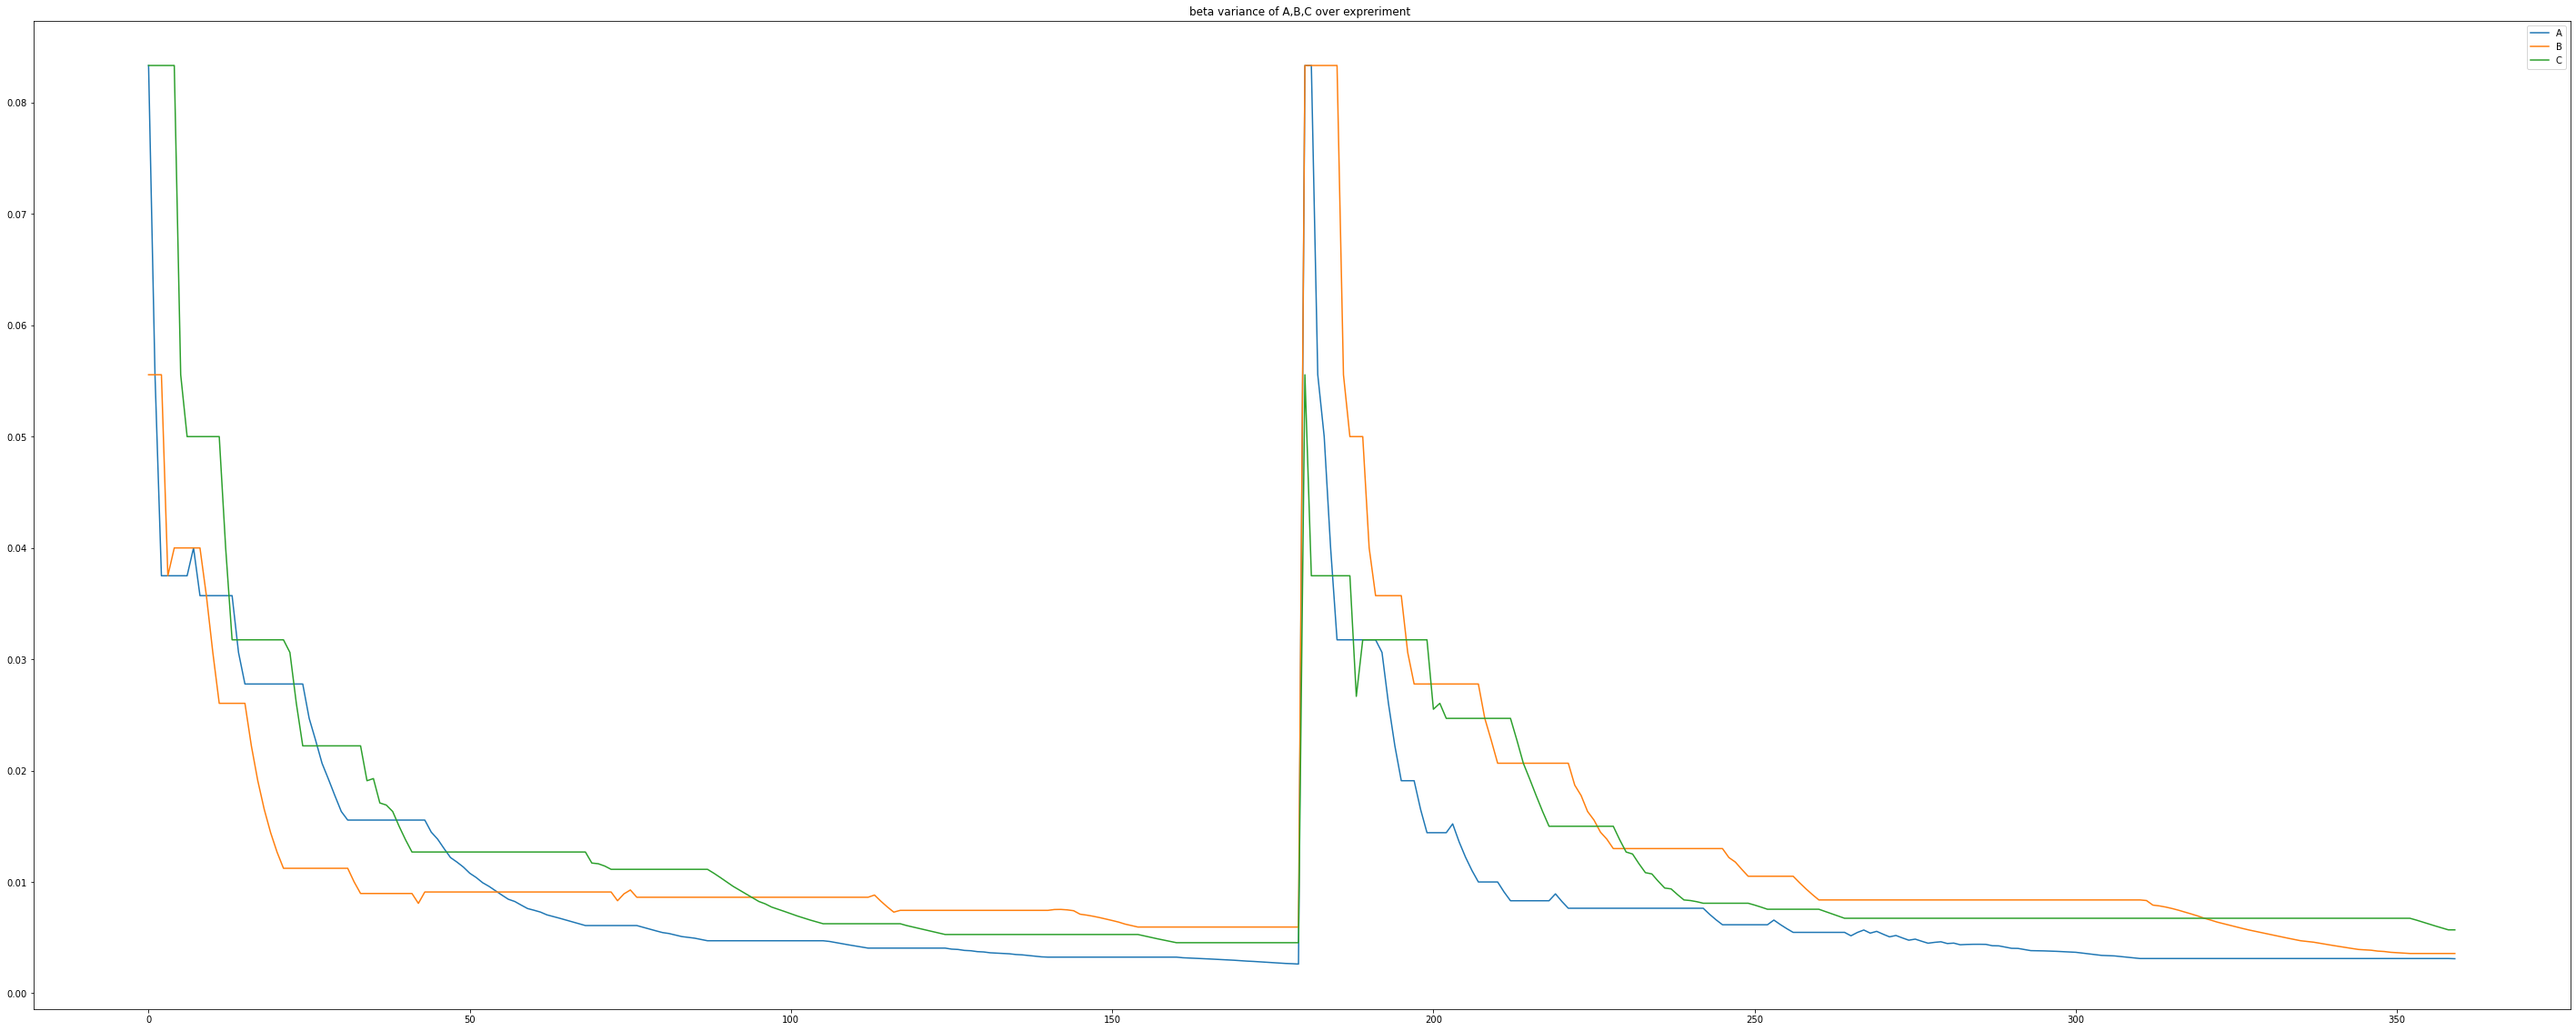

In [15]:
#can change df1 to plot variance of different sections fothe data. Problems I see... continue to decay accross contingencies, not necessarily respresenting something about ucnertainty. 
#They all decrease very heavily with only a few trials of information- how much information/trial gained? 
df1=df[0:360]
plt.figure(figsize=(50,20))
plt.plot(df1.varA)
plt.plot(df1.varB)
plt.plot(df1.varC)
plt.title('beta variance of A,B,C over expreriment ')
plt.legend(['A','B','C'])
#plt.vlines((60,120),0,1,colors='red', ls='--',alpha=0.5)


In [18]:
# df2= df[df['trial']==59]


In [19]:
# df['varA_bigger_thanB'] = df['varA'].gt(df['varB'])
# df['varA_bigger_thanC'] = df['varA'].gt(df['varC'])
# df['varB_bigger_thanC'] = df['varB'].gt(df['varC'])

In [20]:
# df

In [21]:
# for ix in range(len(df)):
#     if df.loc[ix,'varA'] != df.loc[ix,'varB']:
#         if df.loc[ix,'varA'] != df.loc[ix,'varC']:
#             if df.loc[ix,'varB'] != df.loc[ix,'varC']:
#                 if df.loc[ix,'varA'] > df.loc[ix,'varB']:
#                     if df.loc[ix,'varA'] > df.loc[ix,'varC']: 
#                         df.loc[ix,'largestVar'] = 'A'
#                     else: 
#                         df.loc[ix,'largestVar'] = 'C'
#                 elif df.loc[ix,'varA'] < df.loc[ix,'varB']:
#                     if df.loc[ix,'varB'] > df.loc[ix,'varC']: 
#                         df.loc[ix,'largestVar'] = 'B'
#                     else: 
#                         df.loc[ix,'largestVar'] = 'C'
# df

In [16]:
#if two stems have equal variance, label 'largest variance' col 0. 
#if not equal, find the one with the largest vairance and label col 'A,B,C'
for ix in range(len(df)):
    if (df.loc[ix,'varA'] == df.loc[ix,'varB']) |(df.loc[ix,'varA'] == df.loc[ix,'varC']) |(df.loc[ix,'varC'] == df.loc[ix,'varB']) :
        df.loc[ix,'largestVar'] = 0
    else:
        if df.loc[ix,'varA'] > df.loc[ix,'varB']:
            if df.loc[ix,'varA'] > df.loc[ix,'varC']: 
                df.loc[ix,'largestVar'] = 'A'
            else: 
                df.loc[ix,'largestVar'] = 'C'
        elif df.loc[ix,'varA'] < df.loc[ix,'varB']:
            if df.loc[ix,'varB'] > df.loc[ix,'varC']: 
                df.loc[ix,'largestVar'] = 'B'
            else: 
                df.loc[ix,'largestVar'] = 'C'

In [23]:
#look at only the last trial of the first contingency, is he at the best?

# df2= df[df['trial']==59]

In [24]:
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,rew_a,rew_b,rew_c,meanA,varA,meanB,varB,meanC,varC,largestVar
0,0,4,B,1,805020202050,20201028,1,0,1,1,...,0.0,1.0,0.0,0.500000,0.083333,0.666667,0.055556,0.500000,0.083333,0.0
1,1,1,A,0,805020202050,20201028,1,1,1,1,...,0.0,1.0,0.0,0.333333,0.055556,0.666667,0.055556,0.500000,0.083333,0.0
2,2,2,A,0,805020202050,20201028,1,2,1,1,...,0.0,1.0,0.0,0.250000,0.037500,0.666667,0.055556,0.500000,0.083333,C
3,3,3,B,1,805020202050,20201028,1,3,1,1,...,0.0,2.0,0.0,0.250000,0.037500,0.750000,0.037500,0.500000,0.083333,0
4,4,4,B,0,805020202050,20201028,1,4,1,1,...,0.0,2.0,0.0,0.250000,0.037500,0.600000,0.040000,0.500000,0.083333,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,...,28.0,36.0,36.0,0.604167,0.004881,0.506849,0.003378,0.606557,0.003849,A
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,...,28.0,36.0,36.0,0.591837,0.004831,0.506849,0.003378,0.606557,0.003849,A
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,...,28.0,36.0,36.0,0.580000,0.004776,0.506849,0.003378,0.606557,0.003849,A
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,...,29.0,36.0,36.0,0.588235,0.004658,0.506849,0.003378,0.606557,0.003849,A


In [25]:
# for ix in range(len(df)):
#     if df.loc[ix,'meanA'] != df.loc[ix,'meanB']:
#         if df.loc[ix,'meanA'] != df.loc[ix,'meanC']:
#             if df.loc[ix,'meanB'] != df.loc[ix,'meanC']:
#                 if df.loc[ix,'meanA'] > df.loc[ix,'meanB']:
#                     if df.loc[ix,'meanA'] > df.loc[ix,'meanC']: 
#                         df.loc[ix,'largestmean'] = 'A'
#                     else: 
#                         df.loc[ix,'largestmean'] = 'C'
#                 elif df.loc[ix,'meanA'] < df.loc[ix,'meanB']:
#                     if df.loc[ix,'meanB'] > df.loc[ix,'meanC']: 
#                             df.loc[ix,'largestmean'] = 'B'
#                     else: 
#                             df.loc[ix,'largestmean'] = 'C'

In [17]:
#same with mean! 
for ix in range(len(df)):
    if (df.loc[ix,'meanA'] == df.loc[ix,'meanB']) |(df.loc[ix,'meanA'] == df.loc[ix,'meanC']) |(df.loc[ix,'meanC'] == df.loc[ix,'meanB']) :
        df.loc[ix,'largestmean'] = 0
    else:
        if df.loc[ix,'meanA'] > df.loc[ix,'meanB']:
            if df.loc[ix,'meanA'] > df.loc[ix,'meanC']: 
                df.loc[ix,'largestmean'] = 'A'
            else: 
                df.loc[ix,'largestmean'] = 'C'
        elif df.loc[ix,'meanA'] < df.loc[ix,'meanB']:
            if df.loc[ix,'meanB'] > df.loc[ix,'meanC']: 
                df.loc[ix,'largestmean'] = 'B'
            else: 
                df.loc[ix,'largestmean'] = 'C'

In [27]:
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,rew_b,rew_c,meanA,varA,meanB,varB,meanC,varC,largestVar,largestmean
0,0,4,B,1,805020202050,20201028,1,0,1,1,...,1.0,0.0,0.500000,0.083333,0.666667,0.055556,0.500000,0.083333,0.0,0.0
1,1,1,A,0,805020202050,20201028,1,1,1,1,...,1.0,0.0,0.333333,0.055556,0.666667,0.055556,0.500000,0.083333,0.0,B
2,2,2,A,0,805020202050,20201028,1,2,1,1,...,1.0,0.0,0.250000,0.037500,0.666667,0.055556,0.500000,0.083333,C,B
3,3,3,B,1,805020202050,20201028,1,3,1,1,...,2.0,0.0,0.250000,0.037500,0.750000,0.037500,0.500000,0.083333,0,B
4,4,4,B,0,805020202050,20201028,1,4,1,1,...,2.0,0.0,0.250000,0.037500,0.600000,0.040000,0.500000,0.083333,C,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,...,36.0,36.0,0.604167,0.004881,0.506849,0.003378,0.606557,0.003849,A,C
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,...,36.0,36.0,0.591837,0.004831,0.506849,0.003378,0.606557,0.003849,A,C
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,...,36.0,36.0,0.580000,0.004776,0.506849,0.003378,0.606557,0.003849,A,C
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,...,36.0,36.0,0.588235,0.004658,0.506849,0.003378,0.606557,0.003849,A,C


In [28]:
# for ix in range(len(df)):
#     if df.loc[ix,'meanA'] < df.loc[ix,'meanB']:
#         if df.loc[ix,'meanA'] < df.loc[ix,'meanC']: 
#             df.loc[ix,'smallestmean'] = 'A'
#         else: 
#             df.loc[ix,'smallestmean'] = 'C'
#     elif df.loc[ix,'meanA'] > df.loc[ix,'meanB']:
#         if df.loc[ix,'meanB'] < df.loc[ix,'meanC']: 
#             df.loc[ix,'smallestmean'] = 'B'
#         else: 
#             df.loc[ix,'smallestmean'] = 'C'

In [29]:
# for ix in range(len(df)):
#     if df.loc[ix,'varA'] < df.loc[ix,'varB']:
#         if df.loc[ix,'varA'] < df.loc[ix,'varC']: 
#             df.loc[ix,'smallestvar'] = 'A'
#         else: 
#             df.loc[ix,'smallestvar'] = 'C'
#     elif df.loc[ix,'varA'] > df.loc[ix,'varB']:
#         if df.loc[ix,'varB'] < df.loc[ix,'varC']: 
#             df.loc[ix,'smallestvar'] = 'B'
#         else: 
#             df.loc[ix,'smallestvar'] = 'C'

In [30]:
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,rew_b,rew_c,meanA,varA,meanB,varB,meanC,varC,largestVar,largestmean
0,0,4,B,1,805020202050,20201028,1,0,1,1,...,1.0,0.0,0.500000,0.083333,0.666667,0.055556,0.500000,0.083333,0.0,0.0
1,1,1,A,0,805020202050,20201028,1,1,1,1,...,1.0,0.0,0.333333,0.055556,0.666667,0.055556,0.500000,0.083333,0.0,B
2,2,2,A,0,805020202050,20201028,1,2,1,1,...,1.0,0.0,0.250000,0.037500,0.666667,0.055556,0.500000,0.083333,C,B
3,3,3,B,1,805020202050,20201028,1,3,1,1,...,2.0,0.0,0.250000,0.037500,0.750000,0.037500,0.500000,0.083333,0,B
4,4,4,B,0,805020202050,20201028,1,4,1,1,...,2.0,0.0,0.250000,0.037500,0.600000,0.040000,0.500000,0.083333,C,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,...,36.0,36.0,0.604167,0.004881,0.506849,0.003378,0.606557,0.003849,A,C
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,...,36.0,36.0,0.591837,0.004831,0.506849,0.003378,0.606557,0.003849,A,C
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,...,36.0,36.0,0.580000,0.004776,0.506849,0.003378,0.606557,0.003849,A,C
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,...,36.0,36.0,0.588235,0.004658,0.506849,0.003378,0.606557,0.003849,A,C


In [31]:
#the next cells start to look into- for every choice, where is he going to? highest mean? highest variance? Too early though, should characterize the metrics themselves first 

In [32]:
# df_firstcont= df[df['cont_num']==1]

In [33]:
# df2= df[df['trial']==59]
# df2

In [34]:
# df_firstcont

In [35]:
# df2[df2.largestVar == df2.smallestmean]
#doesnt realllly appear o be a trend, and bc of different variances of 50% versus others, might not be the best way to look at this 

In [18]:
#should now look at df only when theres a stem switch. 
df3 = df[df['stem_switch']==1]

In [37]:
#should ask, every time he switches stems, is he going to the one with the highest variance? highest mean? 

In [19]:
df3[df3['stem']==df3['largestmean']]

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,rew_b,rew_c,meanA,varA,meanB,varB,meanC,varC,largestVar,largestmean
3,3,3,B,1,805020202050,20201028,1,3,1,1,...,2.0,0.0,0.250000,0.037500,0.750000,0.037500,0.500000,0.083333,0,B
14,14,1,A,1,805020202050,20201028,1,14,1,1,...,2.0,1.0,0.571429,0.030612,0.375000,0.026042,0.333333,0.031746,C,A
25,25,1,A,1,805020202050,20201028,1,25,1,1,...,2.0,2.0,0.555556,0.024691,0.214286,0.011224,0.333333,0.022222,A,A
44,44,1,A,1,805020202050,20201028,1,44,1,1,...,3.0,5.0,0.562500,0.014476,0.222222,0.009097,0.352941,0.012687,A,A
77,77,1,A,0,202050205080,20201028,1,77,1,2,...,5.0,8.0,0.463415,0.005921,0.272727,0.008624,0.428571,0.011132,C,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12763,12763,5,C,1,502020505080,20201107,4,10,11,1,...,3.0,1.0,0.285714,0.025510,0.571429,0.030612,0.666667,0.055556,C,C
12883,12883,5,C,1,202050802020,20201107,4,130,11,3,...,16.0,31.0,0.363636,0.005142,0.361702,0.004810,0.695652,0.004505,A,C
12950,12950,5,C,1,805020205020,20201107,5,17,11,1,...,2.0,1.0,0.600000,0.015000,0.500000,0.035714,0.666667,0.055556,C,C
12963,12963,2,A,0,805020205020,20201107,5,30,11,1,...,2.0,2.0,0.562500,0.014476,0.250000,0.014423,0.333333,0.022222,C,A


In [20]:
#how often does current stem = stem with largest mean? (should plot this for every cintingnecy, might expect to see this happen more often later in contingency)
for ix in range(1,len(df)):
    if df.loc[ix,'stem'] == df.loc[ix,'largestmean']:
        df.loc[ix,'choseHighMean']=1
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,rew_c,meanA,varA,meanB,varB,meanC,varC,largestVar,largestmean,choseHighMean
0,0,4,B,1,805020202050,20201028,1,0,1,1,...,0.0,0.500000,0.083333,0.666667,0.055556,0.500000,0.083333,0.0,0.0,NaN
1,1,1,A,0,805020202050,20201028,1,1,1,1,...,0.0,0.333333,0.055556,0.666667,0.055556,0.500000,0.083333,0.0,B,NaN
2,2,2,A,0,805020202050,20201028,1,2,1,1,...,0.0,0.250000,0.037500,0.666667,0.055556,0.500000,0.083333,C,B,NaN
3,3,3,B,1,805020202050,20201028,1,3,1,1,...,0.0,0.250000,0.037500,0.750000,0.037500,0.500000,0.083333,0,B,1.0
4,4,4,B,0,805020202050,20201028,1,4,1,1,...,0.0,0.250000,0.037500,0.600000,0.040000,0.500000,0.083333,C,B,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,...,36.0,0.604167,0.004881,0.506849,0.003378,0.606557,0.003849,A,C,NaN
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,...,36.0,0.591837,0.004831,0.506849,0.003378,0.606557,0.003849,A,C,NaN
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,...,36.0,0.580000,0.004776,0.506849,0.003378,0.606557,0.003849,A,C,NaN
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,...,36.0,0.588235,0.004658,0.506849,0.003378,0.606557,0.003849,A,C,NaN


In [21]:
for ix in range(1,len(df)):
    if df.loc[ix,'stem'] == df.loc[ix,'largestVar']:
        df.loc[ix,'choseHighVar']=1

In [41]:
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,meanA,varA,meanB,varB,meanC,varC,largestVar,largestmean,choseHighMean,choseHighVar
0,0,4,B,1,805020202050,20201028,1,0,1,1,...,0.500000,0.083333,0.666667,0.055556,0.500000,0.083333,0.0,0.0,NaN,NaN
1,1,1,A,0,805020202050,20201028,1,1,1,1,...,0.333333,0.055556,0.666667,0.055556,0.500000,0.083333,0.0,B,NaN,NaN
2,2,2,A,0,805020202050,20201028,1,2,1,1,...,0.250000,0.037500,0.666667,0.055556,0.500000,0.083333,C,B,NaN,NaN
3,3,3,B,1,805020202050,20201028,1,3,1,1,...,0.250000,0.037500,0.750000,0.037500,0.500000,0.083333,0,B,1.0,NaN
4,4,4,B,0,805020202050,20201028,1,4,1,1,...,0.250000,0.037500,0.600000,0.040000,0.500000,0.083333,C,B,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,...,0.604167,0.004881,0.506849,0.003378,0.606557,0.003849,A,C,NaN,1.0
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,...,0.591837,0.004831,0.506849,0.003378,0.606557,0.003849,A,C,NaN,1.0
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,...,0.580000,0.004776,0.506849,0.003378,0.606557,0.003849,A,C,NaN,1.0
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,...,0.588235,0.004658,0.506849,0.003378,0.606557,0.003849,A,C,NaN,1.0


In [22]:
df['choseHighMean'] = df['choseHighMean'].fillna(0)
df['choseHighVar'] = df['choseHighVar'].fillna(0)


In [39]:
y.index.min()
len(y)
# (y.index.min()+len(y))
# y.index.min()
range(y.index.min(),y.index.min()+len(y))

range(180, 240)

In [ ]:
#broke this because it was giving me an error and i tried to fix, at the polyfit. 

# #for every trial of every session, is he at the one with the highest mean? 
# yint=[]
# slope=[]
# for ix in range(1,(df['sess_chng']).max()):
#     plt.figure()
#     random_session = df[df['sess_chng']==ix]
#     random_session = random_session[random_session['cont_num']==1]
#     plt.plot(random_session.choseHighMean)
    
#     x = range(len(random_session.choseHighMean))
#     y= random_session.choseHighMean
#was oroginally: 
#     z = np.polyfit(y.index.min(), y, 1)


#     z = np.polyfit(range(y.index.min(),y.index.min()+len(y)), y, 1)
# #     z = np.polyfit(x, y, 1)


#     p = np.poly1d(z)
#     plt.plot(range(y.index.min(),y.index.min()+len(y)),p(x),"b--")
#     plt.title('for every trial, does he visit the highest mean')
#                 # plt.xlabel('session')
#                 # plt.ylabel('last significant trial at worst')
#     X2 = sm.add_constant(x)
#     est = sm.OLS(y, X2)
#     est2 = est.fit()
#     yint.append(est2.params[0])
#     slope.append(est2.params[1])
#     # plt.title('every session, last significant trial at worst stem nominal\n any session longer than 200 trials')
#     # # plt.vlines(daychng_ix,0,1,color='red',alpha=.4)
#     # plt.xlabel('session')
#     # plt.ylabel('last significant trial at worst')
#     from sklearn.metrics import r2_score

# # mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

# # print(r2_score(y, mymodel(x)))
# #         x=range(len(at_worst))
# #                 y=at_worst 
# #                 plt.scatter(x,y)
# #                 z = np.polyfit(x, y, 1)
# #                 p = np.poly1d(z)
               

In [ ]:
yint=[]
slope=[]
for ix in range(1,(df['sess_chng']).max()):
    plt.figure()
    random_session = df[df['sess_chng']==ix]
    random_session = random_session[random_session['cont_num']==1]
    plt.plot(random_session.choseHighMean)
    x = range(len(random_session.choseHighMean))
    y= random_session.choseHighMean
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"b--")
    plt.title('for every trial, does he visit the highest mean')
                # plt.xlabel('session')
                # plt.ylabel('last significant trial at worst')
    X2 = sm.add_constant(x)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    yint.append(est2.params[0])
    slope.append(est2.params[1])
    # plt.title('every session, last significant trial at worst stem nominal\n any session longer than 200 trials')
    # # plt.vlines(daychng_ix,0,1,color='red',alpha=.4)
    # plt.xlabel('session')
    # plt.ylabel('last significant trial at worst')
    from sklearn.metrics import r2_score

# mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

# print(r2_score(y, mymodel(x)))
#         x=range(len(at_worst))
#                 y=at_worst 
#                 plt.scatter(x,y)
#                 z = np.polyfit(x, y, 1)
#                 p = np.poly1d(z)
               

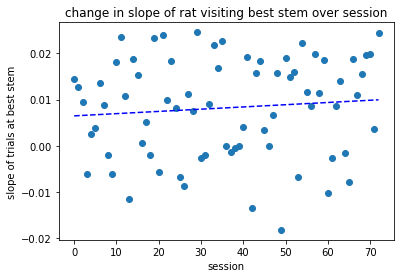

In [48]:
plt.scatter(range(len(slope)),slope)
plt.title('change in slope of rat visiting best stem over session')
x = range(len(slope))
y= slope
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")
plt.xlabel('session')
plt.ylabel('slope of trials at best stem')
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
# yint.append(est2.params[0])
# slope.append(est2.params[1])

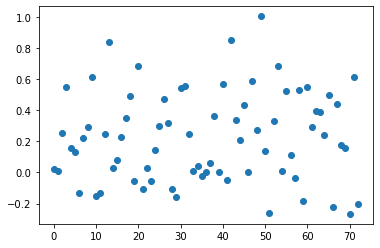

In [ ]:
plt.scatter(range(len(yint)),yint)

In [ ]:
#for every trial of every session, is he at the one with the highest variance(blue) or highest mean(orange)? 

for ix in range(1,(df['sess_chng']).max()):
    plt.figure()
    random_session = df[df['sess_chng']==ix]
    random_session = random_session[random_session['cont_num']==1]
    plt.plot(random_session.choseHighVar, label='var')
    plt.plot(random_session.choseHighMean, label='mean')
    plt.legend(loc="upper right")
    plt.title(f'day={random_session.day.iloc[0]} session = {random_session.session.iloc[0]}' )

In [43]:
for ix in range(1,(df['sess_chng']).max()):
   # plt.figure()
    random_session = df[df['sess_chng']==ix]
    random_session = random_session[random_session['cont_num']==1]
    stem_switches = random_session[random_session['stem_switch']==1]
stem_switches
#     plt.plot(random_session.choseHighVar)
#     plt.plot(random_session.choseHighMean)
#     plt.title(f'day={random_session.day.iloc[0]} session = {random_session.session.iloc[0]}' )

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,meanA,varA,meanB,varB,meanC,varC,largestVar,largestmean,choseHighMean,choseHighVar
12933,12933,4,B,0,805020205020,20201107,5,0,11,1,...,0.500000,0.083333,0.333333,0.055556,0.500000,0.083333,0,0,0.0,0.0
12937,12937,2,A,0,805020205020,20201107,5,4,11,1,...,0.333333,0.055556,0.500000,0.035714,0.500000,0.083333,C,0,0.0,0.0
12950,12950,5,C,1,805020205020,20201107,5,17,11,1,...,0.600000,0.015000,0.500000,0.035714,0.666667,0.055556,C,C,1.0,1.0
12957,12957,4,B,0,805020205020,20201107,5,24,11,1,...,0.600000,0.015000,0.428571,0.030612,0.333333,0.022222,B,A,0.0,1.0
12963,12963,2,A,0,805020205020,20201107,5,30,11,1,...,0.562500,0.014476,0.250000,0.014423,0.333333,0.022222,C,A,1.0,0.0


In [44]:
#For the last stem switch, does he choose the one with the highest mean? 
last_bout_chose_highest_mean=[]
for ix in range(1,(df['sess_chng']).max()):
    random_session = df[df['sess_chng']==ix]
    random_session = random_session[random_session['cont_num']==1]
    stem_switches = random_session[random_session['stem_switch']==1]
    last_switch = stem_switches.tail(1)
    chose_highest = last_switch.choseHighMean
    last_bout_chose_highest_mean.append(chose_highest)

ValueError: Polynomial must be 1d only.

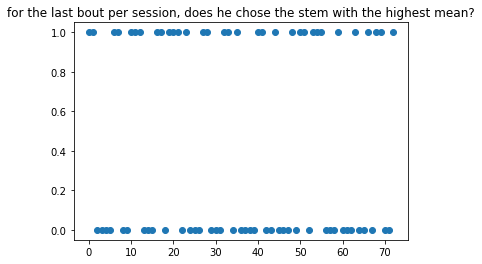

In [49]:
plt.scatter(range(len(last_bout_chose_highest_mean)),last_bout_chose_highest_mean)
plt.title('for the last bout per session, does he chose the stem with the highest mean?')
x = range(len(last_bout_chose_highest_mean))
y= last_bout_chose_highest_mean
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")
plt.xlabel('session')
plt.ylabel('choose highest mean?')
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
#This sometimes if he gets a couple nr in a row, he will leave, and maybe the last bout isn't exactly the best. maybe the exploit bout? but have already see nthis doesnt always hold, because sometimes it gets good and so he stays. not always explaining his choice. ugh what am i trying to characterize. 

In [47]:
chose_highest = last_switch.choseHighMean

In [48]:
chose_highest

12963    1.0
Name: choseHighMean, dtype: float64

In [49]:
#I want to say that in the first half of the contingency, maybe he picks the one with the highest variance, but later on, he picks the stem with the highest mean. 
# df[1:60]

In [50]:
#One thing is that on the row thatt he rat switches stems, the mean and variance inclue the first poke of the new bout
#should look at then he switches stems, what were the metrics right before? Why did he decide to come to this stem? wont work for trial 0. 


In [87]:
for ix in range(1,(df['sess_chng']).max()):
    random_session = df[df['sess_chng']==ix]
    print(random_session[random_session.stem_switch]['choseHighMean'])
random_session[random_session.stem_switch]['choseHighVar']


12933    0.0
12937    0.0
12950    1.0
12957    0.0
12963    1.0
Name: choseHighMean, dtype: float64


12933    0.0
12937    0.0
12950    1.0
12957    1.0
12963    0.0
Name: choseHighVar, dtype: float64

In [52]:
first_bout = random_session[random_session.stem_switch].iloc[0]
other_bouts = random_session[random_session.stem_switch].iloc[1:]
metrics_right_before = random_session[random_session.stem_switch].iloc[1:]

In [53]:
other_bouts

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,meanA,varA,meanB,varB,meanC,varC,largestVar,largestmean,choseHighMean,choseHighVar
12937,12937,2,A,0,805020205020,20201107,5,4,11,1,...,0.333333,0.055556,0.500000,0.035714,0.500000,0.083333,C,0,0.0,0.0
12950,12950,5,C,1,805020205020,20201107,5,17,11,1,...,0.600000,0.015000,0.500000,0.035714,0.666667,0.055556,C,C,1.0,1.0
12957,12957,4,B,0,805020205020,20201107,5,24,11,1,...,0.600000,0.015000,0.428571,0.030612,0.333333,0.022222,B,A,0.0,1.0
12963,12963,2,A,0,805020205020,20201107,5,30,11,1,...,0.562500,0.014476,0.250000,0.014423,0.333333,0.022222,C,A,1.0,0.0


In [54]:
#What i want to have ar the metrics right before the stem switch. So, if he switches to B at trial 5, I want to see what the metrics were at trial 4, and where he decides to go in trial 5. 

#so what i want is for the stem_switch T/F to be shifted back 1, and also for there to be a new stem for where he goes next (the stems also shifted back one. )

df['trial_b4_stemswitch'] = df['stem_switch'].shift(-1)
df
df['next_stem'] = df['stem'].shift(-1)
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,meanB,varB,meanC,varC,largestVar,largestmean,choseHighMean,choseHighVar,trial_b4_stemswitch,next_stem
0,0,4,B,1,805020202050,20201028,1,0,1,1,...,0.666667,0.055556,0.500000,0.083333,0.0,0.0,0.0,0.0,True,A
1,1,1,A,0,805020202050,20201028,1,1,1,1,...,0.666667,0.055556,0.500000,0.083333,0.0,B,0.0,0.0,False,A
2,2,2,A,0,805020202050,20201028,1,2,1,1,...,0.666667,0.055556,0.500000,0.083333,C,B,0.0,0.0,True,B
3,3,3,B,1,805020202050,20201028,1,3,1,1,...,0.750000,0.037500,0.500000,0.083333,0,B,1.0,0.0,False,B
4,4,4,B,0,805020202050,20201028,1,4,1,1,...,0.600000,0.040000,0.500000,0.083333,C,B,1.0,0.0,True,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,...,0.506849,0.003378,0.606557,0.003849,A,C,0.0,1.0,False,A
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,...,0.506849,0.003378,0.606557,0.003849,A,C,0.0,1.0,False,A
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,...,0.506849,0.003378,0.606557,0.003849,A,C,0.0,1.0,False,A
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,...,0.506849,0.003378,0.606557,0.003849,A,C,0.0,1.0,False,A


In [55]:
# other_bouts.iloc[other_bouts[other_bouts.stem_switch].index-1]

#for ix in range(1,(df['sess_chng']).max()):
random_session = df[df['sess_chng']==13]
random_session = random_session[random_session['cont_num']==1]
b4_stem_switches = random_session[random_session['trial_b4_stemswitch']==1]

In [56]:
b4_stem_switches
# random_session.loc[other_bouts[other_bouts.stem_switch].index-1]
#should add something to cehck if the variance/means are equal, and account for that somehow??
#at least in this example, seems like he goes to the stems with the highest variance, and then the one with the highest mean. 

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,meanB,varB,meanC,varC,largestVar,largestmean,choseHighMean,choseHighVar,trial_b4_stemswitch,next_stem
2133,2133,4,B,1,205020205050,20201030,4,0,3,1,...,0.666667,0.055556,0.500000,0.083333,0,0,0.0,0.0,True,C
2137,2137,6,C,1,205020205050,20201030,4,4,3,1,...,0.666667,0.055556,0.833333,0.019841,A,C,1.0,0.0,True,A
2145,2145,2,A,1,205020205050,20201030,4,12,3,1,...,0.666667,0.055556,0.833333,0.019841,B,C,0.0,0.0,True,B
2150,2150,4,B,0,205020205050,20201030,4,17,3,1,...,0.250000,0.020833,0.833333,0.019841,A,C,0.0,0.0,True,C
2166,2166,6,C,0,205020205050,20201030,4,33,3,1,...,0.250000,0.020833,0.590909,0.010510,A,C,1.0,0.0,True,B
2169,2169,4,B,1,205020205050,20201030,4,36,3,1,...,0.272727,0.016529,0.590909,0.010510,A,C,0.0,0.0,True,A
2177,2177,2,A,0,205020205050,20201030,4,44,3,1,...,0.272727,0.016529,0.590909,0.010510,B,C,0.0,0.0,True,C


In [57]:
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,meanB,varB,meanC,varC,largestVar,largestmean,choseHighMean,choseHighVar,trial_b4_stemswitch,next_stem
0,0,4,B,1,805020202050,20201028,1,0,1,1,...,0.666667,0.055556,0.500000,0.083333,0.0,0.0,0.0,0.0,True,A
1,1,1,A,0,805020202050,20201028,1,1,1,1,...,0.666667,0.055556,0.500000,0.083333,0.0,B,0.0,0.0,False,A
2,2,2,A,0,805020202050,20201028,1,2,1,1,...,0.666667,0.055556,0.500000,0.083333,C,B,0.0,0.0,True,B
3,3,3,B,1,805020202050,20201028,1,3,1,1,...,0.750000,0.037500,0.500000,0.083333,0,B,1.0,0.0,False,B
4,4,4,B,0,805020202050,20201028,1,4,1,1,...,0.600000,0.040000,0.500000,0.083333,C,B,1.0,0.0,True,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,...,0.506849,0.003378,0.606557,0.003849,A,C,0.0,1.0,False,A
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,...,0.506849,0.003378,0.606557,0.003849,A,C,0.0,1.0,False,A
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,...,0.506849,0.003378,0.606557,0.003849,A,C,0.0,1.0,False,A
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,...,0.506849,0.003378,0.606557,0.003849,A,C,0.0,1.0,False,A


In [ ]:
df1=df[0:360]

for ix in range(1,(df['sess_chng']).max()):
    random_session = df[df['sess_chng']==ix]
    random_session = random_session[random_session['cont_num']==1]
#     bout = random_session[random_session.stem_switch==1]
    session = random_session['session'].iloc[0]
    day =random_session['day'].iloc[0]
    contin = random_session['contingency'].iloc[0]
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
    #fig.suptitle('Variance(left) vs Mean(right) per 1st contingency')
    x=range(len(random_session))
    y1=random_session.varA
    y2=random_session.varB
    y3=random_session.varC
    z1=random_session.meanA
    z2=random_session.meanB
    z3=random_session.meanC
    ax1.set_title(f'day={day},sesh={session},\n{contin}\n Variance' )
    ax1.plot(x, y1, label='A')
    ax1.plot(x,y2,label='B')
    ax1.plot(x,y3,label='C')
    ax1.legend(loc="upper right")
    ax1.vlines((random_session[random_session['stem_switch']==1].trial-1),0,.08,colors='red', ls='--',alpha=0.5)


    ax2.set_title(f'day={day},sesh={session},\n{contin}\nMean' )

    ax2.plot(x, z1, label='A')
    ax2.plot(x, z2, label='B')
    ax2.plot(x, z3, label='C')
    ax2.legend(loc="upper right")
    ax2.set_ylim([0,1])
    ax2.vlines((random_session[random_session['stem_switch']==1].trial-1),0,1,colors='red', ls='--',alpha=0.5)


# b4_stem_switches = random_session[random_session['trial_b4_stemswitch']==1]
#     plt.figure(figsize=(15,5))
#     plt.plot(random_session.varA)
#     plt.plot(random_session.varB)
#     plt.plot(random_session.varC)
#     plt.title(f'beta variance of A,B,C over expreriment\n day={day} \nsession={session} \n cont={contin}')
#     plt.legend(['A','B','C'])
    #plt.vlines((60,120),0,1,co

In [59]:
random_session[random_session['stem_switch']==1].trial



12933     0
12937     4
12950    17
12957    24
12963    30
Name: trial, dtype: int64

In [51]:
#maybe look at the highest variance throughout day 


equal = (df['meanA'] == df['meanB']) | (df['meanB'] == df['meanC']) | (df['meanA'] == df['meanC'])
df['best_stem'] = df.loc[~equal, ['meanA', 'meanB', 'meanC']].idxmax(axis=1)
for ix in range(len(df)):
    if df.loc[ix,'best_stem'] == 'meanA':
        df.loc[ix,'best_stem'] = df.loc[ix,'meanA']
    if df.loc[ix,'best_stem'] == 'meanB':
        df.loc[ix,'best_stem'] = df.loc[ix,'meanB']
    if df.loc[ix,'best_stem'] == 'meanC':
        df.loc[ix,'best_stem'] = df.loc[ix,'meanC']

In [61]:
df[0:20]

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,varB,meanC,varC,largestVar,largestmean,choseHighMean,choseHighVar,trial_b4_stemswitch,next_stem,best_stem
0,0,4,B,1,805020202050,20201028,1,0,1,1,...,0.055556,0.500000,0.083333,0.0,0.0,0.0,0.0,True,A,NaN
1,1,1,A,0,805020202050,20201028,1,1,1,1,...,0.055556,0.500000,0.083333,0.0,B,0.0,0.0,False,A,0.666667
2,2,2,A,0,805020202050,20201028,1,2,1,1,...,0.055556,0.500000,0.083333,C,B,0.0,0.0,True,B,0.666667
3,3,3,B,1,805020202050,20201028,1,3,1,1,...,0.037500,0.500000,0.083333,0,B,1.0,0.0,False,B,0.75
4,4,4,B,0,805020202050,20201028,1,4,1,1,...,0.040000,0.500000,0.083333,C,B,1.0,0.0,True,C,0.6
5,5,5,C,0,805020202050,20201028,1,5,1,1,...,0.040000,0.333333,0.055556,C,B,0.0,1.0,False,C,0.6
6,6,6,C,1,805020202050,20201028,1,6,1,1,...,0.040000,0.500000,0.050000,C,B,0.0,1.0,True,A,0.6
7,7,1,A,1,805020202050,20201028,1,7,1,1,...,0.040000,0.500000,0.050000,0,B,0.0,0.0,False,A,0.6
8,8,2,A,1,805020202050,20201028,1,8,1,1,...,0.040000,0.500000,0.050000,C,0,0.0,0.0,True,B,NaN
9,9,3,B,0,805020202050,20201028,1,9,1,1,...,0.035714,0.500000,0.050000,0,0,0.0,0.0,False,B,NaN


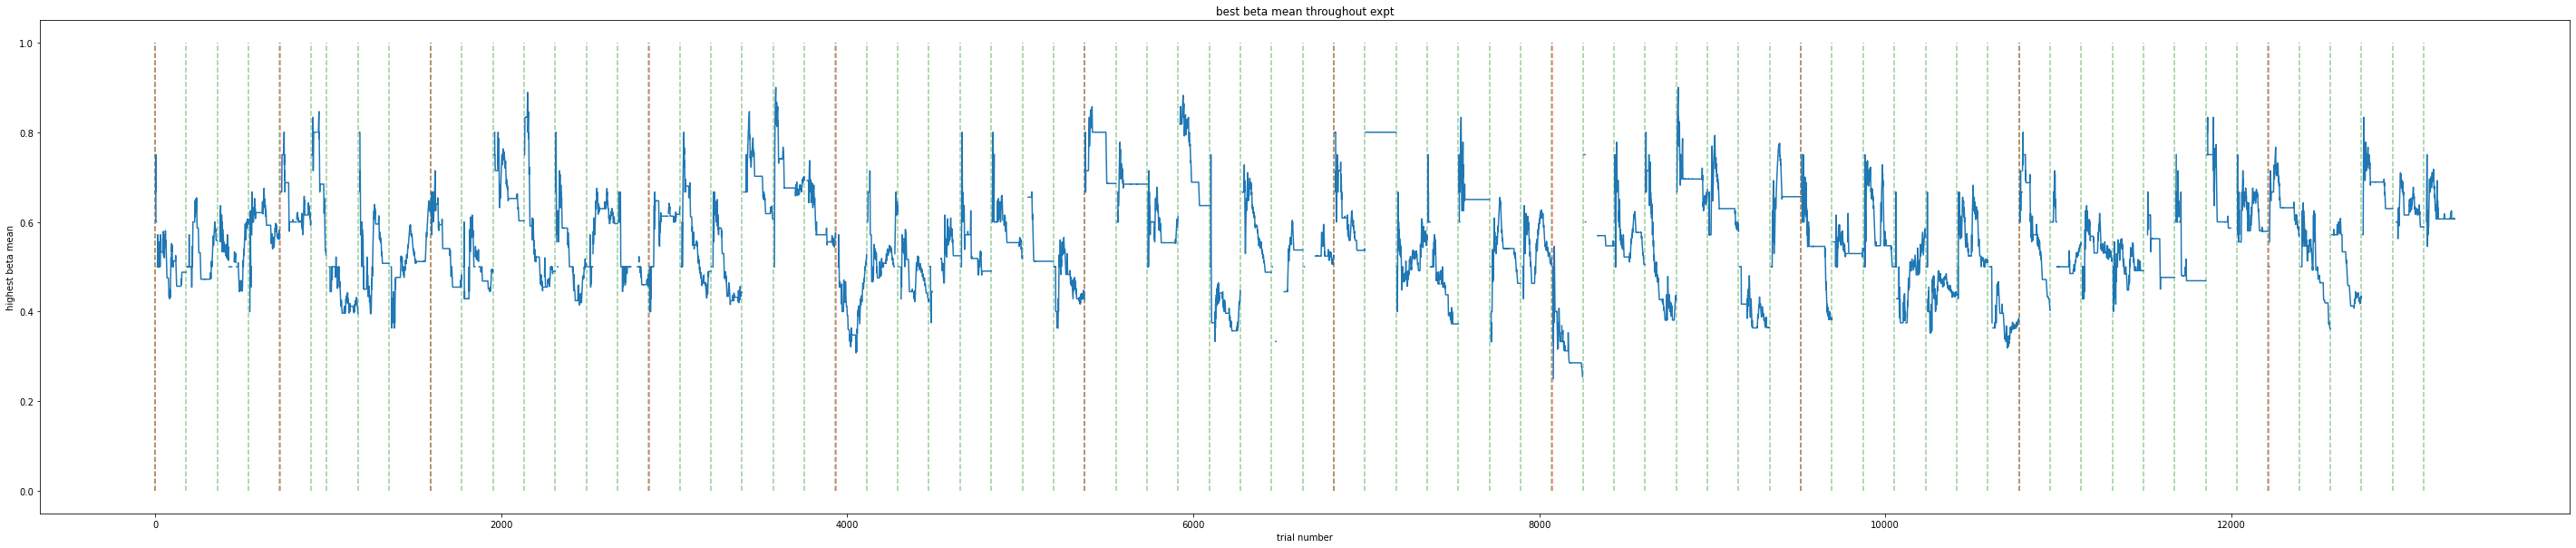

In [52]:
plt.figure(figsize=(50,10))
plt.plot(df.best_stem)
plt.title('best beta mean throughout expt')
plt.xlabel('trial number')
plt.ylabel('highest beta mean')
plt.vlines((df[df['day_chng']].index),0,1,colors='red', ls='--',alpha=0.5)
# plt.vlines((df[df['sess_chng']].index),0,1,colors='blue', ls='--',alpha=0.5)
df['session_chng'] = df['session'].ne(df['session'].shift())

plt.vlines(df[df['session_chng']].index-1,0,1,colors='green', ls='--',alpha=0.4,label='session')


In [63]:
equal = (df['varA'] == df['varB']) | (df['varB'] == df['varC']) | (df['varA'] == df['varC'])
df['highest_var'] = df.loc[~equal, ['varA', 'varB', 'varC']].idxmax(axis=1)
for ix in range(len(df)):
    if df.loc[ix,'highest_var'] == 'varA':
        df.loc[ix,'highest_var'] = df.loc[ix,'varA']
    if df.loc[ix,'highest_var'] == 'varB':
        df.loc[ix,'highest_var'] = df.loc[ix,'varB']
    if df.loc[ix,'highest_var'] == 'varC':
        df.loc[ix,'highest_var'] = df.loc[ix,'varC']

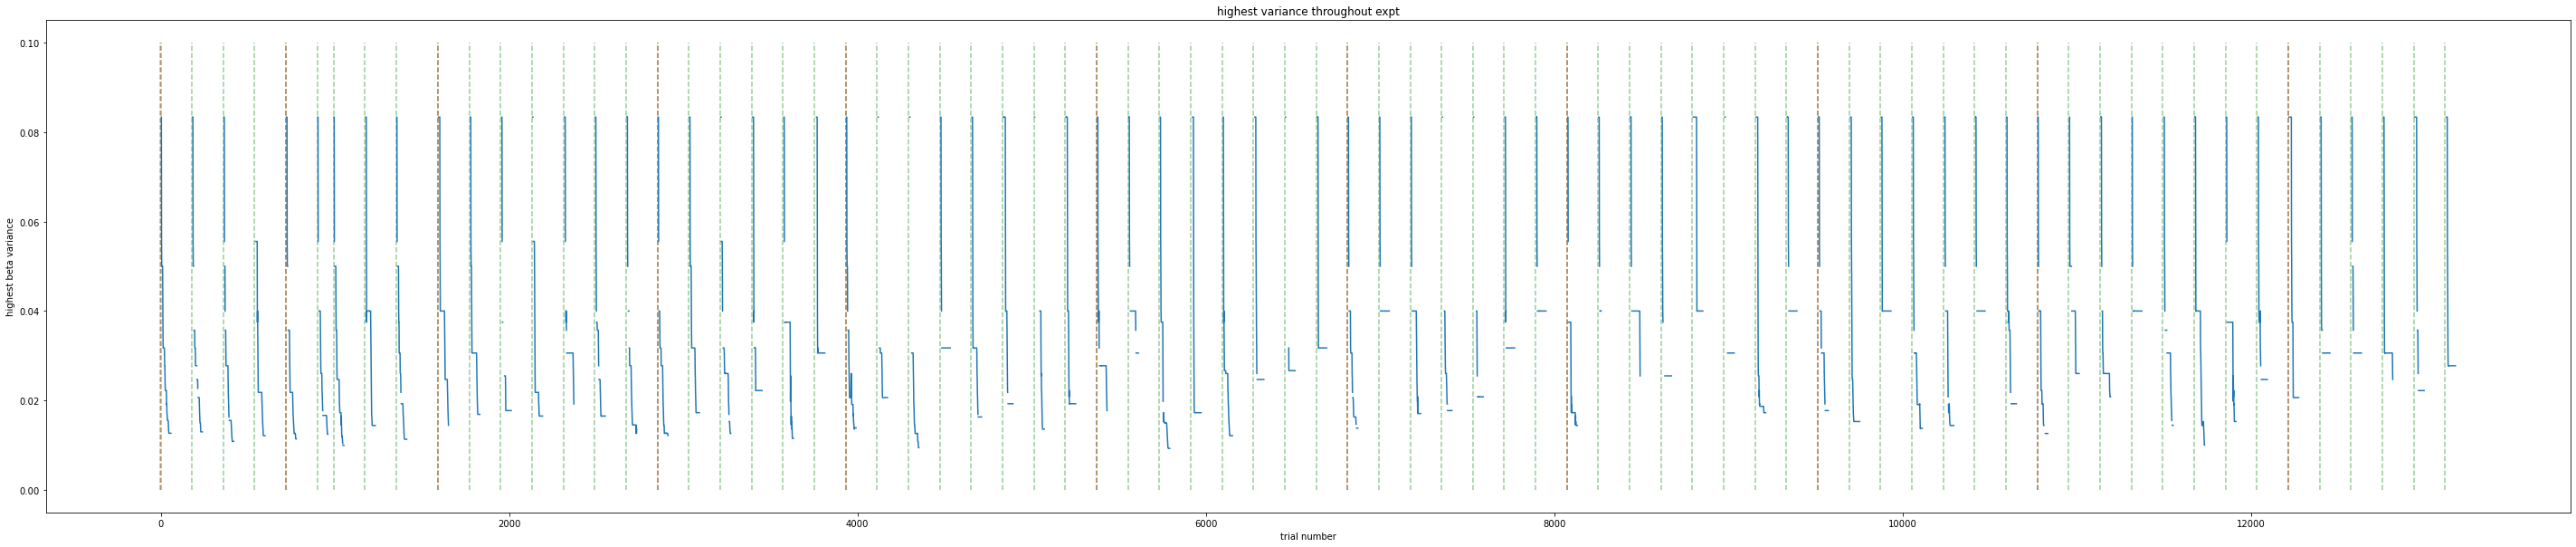

In [64]:
plt.figure(figsize=(50,10))
df_first=df[df['cont_num']==1]
plt.plot(df_first.highest_var)
plt.title('highest variance throughout expt')
plt.xlabel('trial number')
plt.ylabel('highest beta variance')
plt.vlines((df[df['day_chng']].index),0,.1,colors='red', ls='--',alpha=0.5)
# plt.vlines((df[df['sess_chng']].index),0,1,colors='blue', ls='--',alpha=0.5)
# df['session_chng'] = df['session'].ne(df['session'].shift())

plt.vlines(df[df['session_chng']].index-1,0,.1,colors='green', ls='--',alpha=0.4,label='session')

In [53]:
equal = (df['meanA'] == df['meanB']) | (df['meanB'] == df['meanC']) | (df['meanA'] == df['meanC'])
df['best_stem'] = df.loc[~equal, ['meanA', 'meanB', 'meanC']].idxmax(axis=1)
for ix in range(len(df)):
    if df.loc[ix,'best_stem'] == 'meanA':
        df.loc[ix,'best_stem'] = 'A'
    if df.loc[ix,'best_stem'] == 'meanB':
        df.loc[ix,'best_stem'] = 'B'
    if df.loc[ix,'best_stem'] == 'meanC':
        df.loc[ix,'best_stem'] = 'C'
for ix in range(len(df)):
    if df.loc[ix,'best_stem']== df.loc[ix,'stem']:
        df.loc[ix,'at_beta_best'] =1
    else:
        df.loc[ix,'at_beta_best'] =0

In [66]:
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,largestVar,largestmean,choseHighMean,choseHighVar,trial_b4_stemswitch,next_stem,best_stem,session_chng,highest_var,at_beta_best
0,0,4,B,1,805020202050,20201028,1,0,1,1,...,0.0,0.0,0.0,0.0,True,A,NaN,True,NaN,0.0
1,1,1,A,0,805020202050,20201028,1,1,1,1,...,0.0,B,0.0,0.0,False,A,B,False,NaN,0.0
2,2,2,A,0,805020202050,20201028,1,2,1,1,...,C,B,0.0,0.0,True,B,B,False,0.083333,0.0
3,3,3,B,1,805020202050,20201028,1,3,1,1,...,0,B,1.0,0.0,False,B,B,False,NaN,1.0
4,4,4,B,0,805020202050,20201028,1,4,1,1,...,C,B,1.0,0.0,True,C,B,False,0.083333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,...,A,C,0.0,1.0,False,A,C,False,0.004881,0.0
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,...,A,C,0.0,1.0,False,A,C,False,0.004831,0.0
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,...,A,C,0.0,1.0,False,A,C,False,0.004776,0.0
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,...,A,C,0.0,1.0,False,A,C,False,0.004658,0.0


In [54]:
at_best_per_cont = []
for cont in range(1,df['new_cont'].max()+1):
    at_best= (df[df['new_cont']==cont]['at_beta_best'].sum())
    at_best_per_cont.append(at_best) 

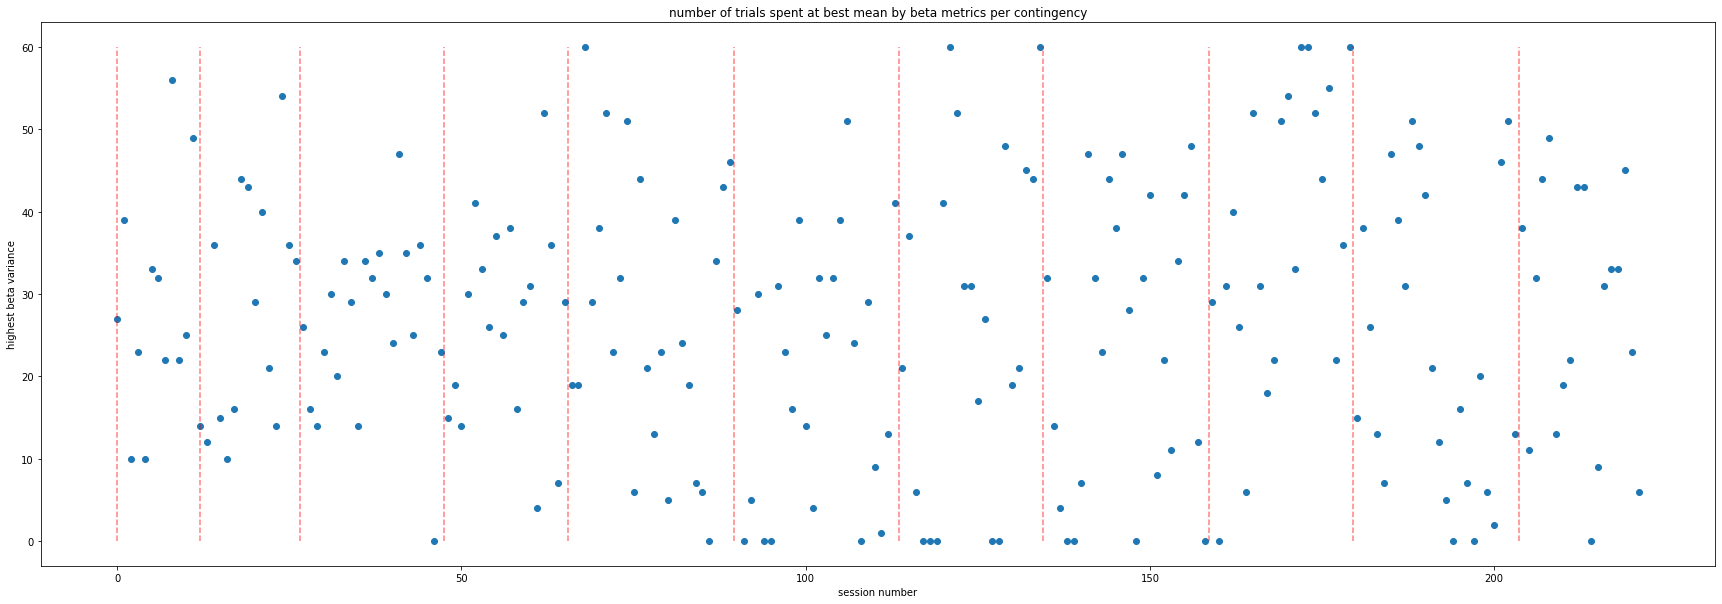

In [55]:
plt.figure(figsize=(30,10))
# df_first=df[df['cont_num']==1]
plt.scatter(range(len(at_best_per_cont)),(at_best_per_cont))
plt.title('number of trials spent at best mean by beta metrics per contingency')
plt.xlabel('session number')
plt.ylabel('highest beta variance')
plt.vlines((df[df['day_chng']].index-1)/60,0,60,colors='red', ls='--',alpha=0.5)
# plt.vlines((df[df['sess_chng']].index),0,1,colors='blue', ls='--',alpha=0.5)
# df['session_chng'] = df['session'].ne(df['session'].shift())

# plt.vlines(df[df['session_chng']].index-1,0,.1,colors='green', ls='--',alpha=0.4,label='session')

# plt.plot(at_best_per_cont[0::3])

In [69]:
at_best_per_cont[0::3].index#at_best_per_cont[0::3]

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [70]:
#probability of leaving stem given reward history at beginning versus end of contingency
#I want to ask if hes visiting stems with the highest variance at the beginning of contingency, and ones with the highest mean towards the end. 
#look only when he exploits. what is it about the stem? 
#what is the average mean every contingency? 
#it would be important to understand how variance drops off with information. Theres a huge decrease right away no matter what, so what does that difference in vairance look like?  difference in variance 

In [71]:
#what is the change in variance per trial? Does the little bit of extra variance around 50% matter? 
#This is perfect memory. What do things look like if you only use the last ~10 trials of information? 
#whats going on in the contingencies when he spends almost 0 trials at the best stem? Maybe this is a problem because of memory. 
#should def find the overlap between the distributions. Maybe its really high in the beginning, the he speartes them.
#definitly saw that the highest variances were the two lowest 

In [72]:
random_session

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,meanB,varB,meanC,varC,largestVar,largestmean,choseHighMean,choseHighVar,trial_b4_stemswitch,next_stem
12933,12933,4,B,0,805020205020,20201107,5,0,11,1,...,0.333333,0.055556,0.500000,0.083333,0,0,0.0,0.0,False,B
12934,12934,3,B,1,805020205020,20201107,5,1,11,1,...,0.500000,0.050000,0.500000,0.083333,0,0,0.0,0.0,False,B
12935,12935,4,B,0,805020205020,20201107,5,2,11,1,...,0.400000,0.040000,0.500000,0.083333,0,0,0.0,0.0,False,B
12936,12936,3,B,1,805020205020,20201107,5,3,11,1,...,0.500000,0.035714,0.500000,0.083333,0,0,0.0,0.0,True,A
12937,12937,2,A,0,805020205020,20201107,5,4,11,1,...,0.500000,0.035714,0.500000,0.083333,C,0,0.0,0.0,False,A
12938,12938,1,A,1,805020205020,20201107,5,5,11,1,...,0.500000,0.035714,0.500000,0.083333,C,0,0.0,0.0,False,A
12939,12939,2,A,1,805020205020,20201107,5,6,11,1,...,0.500000,0.035714,0.500000,0.083333,C,0,0.0,0.0,False,A
12940,12940,1,A,1,805020205020,20201107,5,7,11,1,...,0.500000,0.035714,0.500000,0.083333,C,0,0.0,0.0,False,A
12941,12941,2,A,1,805020205020,20201107,5,8,11,1,...,0.500000,0.035714,0.500000,0.083333,C,0,0.0,0.0,False,A
12942,12942,1,A,1,805020205020,20201107,5,9,11,1,...,0.500000,0.035714,0.500000,0.083333,C,0,0.0,0.0,False,A


In [73]:
random_session.rew_a.rolling(10, min_periods=1).mean()


12933     0.000000
12934     0.000000
12935     0.000000
12936     0.000000
12937     0.000000
12938     0.166667
12939     0.428571
12940     0.750000
12941     1.111111
12942     1.500000
12943     2.100000
12944     2.800000
12945     3.500000
12946     4.300000
12947     5.100000
12948     5.800000
12949     6.400000
12950     6.900000
12951     7.300000
12952     7.600000
12953     7.800000
12954     7.900000
12955     8.000000
12956     8.000000
12957     8.000000
12958     8.000000
12959     8.000000
12960     8.000000
12961     8.000000
12962     8.000000
12963     8.000000
12964     8.100000
12965     8.300000
12966     8.600000
12967     8.900000
12968     9.300000
12969     9.700000
12970    10.200000
12971    10.800000
12972    11.500000
12973    12.300000
12974    13.100000
12975    13.900000
12976    14.700000
12977    15.600000
12978    16.500000
12979    17.400000
12980    18.300000
12981    19.200000
12982    20.000000
12983    20.800000
12984    21.500000
12985    22.

In [67]:
random_session = df[df['sess_chng']==1]
random_session = random_session[random_session['cont_num']==1]

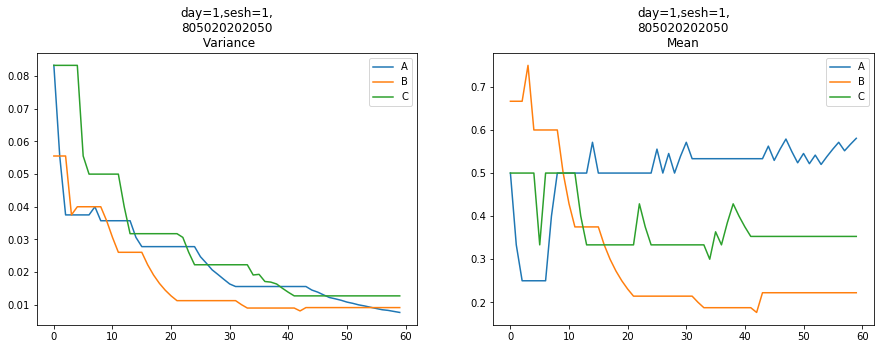

In [68]:
session = random_session['session'].iloc[0]
day =random_session['day'].iloc[0]
contin = random_session['contingency'].iloc[0]
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
    #fig.suptitle('Variance(left) vs Mean(right) per 1st contingency')
x=range(len(random_session))
y1=random_session.varA
y2=random_session.varB
y3=random_session.varC
z1=random_session.meanA
z2=random_session.meanB
z3=random_session.meanC
ax1.set_title(f'day={day},sesh={session},\n{contin}\n Variance' )
ax1.plot(x, y1, label='A')
ax1.plot(x,y2,label='B')
ax1.plot(x,y3,label='C')
ax1.legend(loc="upper right")
ax2.set_title(f'day={day},sesh={session},\n{contin}\nMean' )

ax2.plot(x, z1, label='A')
ax2.plot(x, z2, label='B')
ax2.plot(x, z3, label='C')
ax2.legend(loc="upper right")

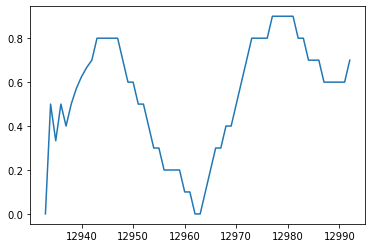

In [75]:
x = random_session.reward.rolling(10, min_periods=1).mean()
plt.plot(x)


In [57]:
#i need a col with 1s and 0s, rewarded at a or not. 

for ix in range(len(df)):
    if df.loc[ix,'stem']=='A':
        if df.loc[ix,'reward']==1:
            df.loc[ix,'rewarded_at_a'] = 1
        else: 
            df.loc[ix,'rewarded_at_a'] = 0
    if df.loc[ix,'stem']=='B':
        if df.loc[ix,'reward']==1:
            df.loc[ix,'rewarded_at_b'] = 1
        else: 
            df.loc[ix,'rewarded_at_b'] = 0
    if df.loc[ix,'stem']=='C':
        if df.loc[ix,'reward']==1:
            df.loc[ix,'rewarded_at_c'] = 1
        else: 
            df.loc[ix,'rewarded_at_c'] = 0
df['rewarded_at_a'] = df['rewarded_at_a'].fillna(0)
df['rewarded_at_b'] = df['rewarded_at_b'].fillna(0)
df['rewarded_at_c'] = df['rewarded_at_c'].fillna(0)
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,largestVar,largestmean,choseHighMean,choseHighVar,best_stem,session_chng,at_beta_best,rewarded_at_b,rewarded_at_a,rewarded_at_c
0,0,4,B,1,805020202050,20201028,1,0,1,1,...,0.0,0.0,0.0,0.0,NaN,True,0.0,1.0,0.0,0.0
1,1,1,A,0,805020202050,20201028,1,1,1,1,...,0.0,B,0.0,0.0,B,False,0.0,0.0,0.0,0.0
2,2,2,A,0,805020202050,20201028,1,2,1,1,...,C,B,0.0,0.0,B,False,0.0,0.0,0.0,0.0
3,3,3,B,1,805020202050,20201028,1,3,1,1,...,0,B,1.0,0.0,B,False,1.0,1.0,0.0,0.0
4,4,4,B,0,805020202050,20201028,1,4,1,1,...,C,B,1.0,0.0,B,False,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,...,A,C,0.0,1.0,C,False,0.0,0.0,1.0,0.0
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,...,A,C,0.0,1.0,C,False,0.0,0.0,0.0,0.0
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,...,A,C,0.0,1.0,C,False,0.0,0.0,0.0,0.0
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,...,A,C,0.0,1.0,C,False,0.0,0.0,1.0,0.0


In [ ]:
#this cell caluclates a rolling beta distribution for each of the stems. Window of 15, min periods adjustable 

#I liket he idea of this 
#because I want the rat to have an imperfect memoery of the stems, but problematic
#because (?? wish i had finished writing this!) 

for ix in range(1,(df['sess_chng']).max()):
    plt.figure()
    min_p=2
    random_session = df[df['sess_chng']==ix]
    random_session = random_session[random_session['cont_num']==1]
    session = random_session['session'].iloc[0]
    day =random_session['day'].iloc[0]
    contin = random_session['contingency'].iloc[0]
    ss=random_session[random_session['stem_switch']==1]
    a_s = random_session.rewarded_at_a.rolling(15, min_periods = min_p).sum()
    a_v = random_session.ChooseA.rolling(15,min_periods = min_p).sum() 
    a_f= a_v-a_s
    b_s = random_session.rewarded_at_b.rolling(15,min_periods = min_p).sum()
    b_v = random_session.ChooseB.rolling(15,min_periods = min_p).sum() 
    b_f= b_v-b_s
    c_s = random_session.rewarded_at_c.rolling(15,min_periods = min_p).sum()
    c_v = random_session.ChooseC.rolling(15,min_periods = min_p).sum() 
    c_f= c_v-c_s


    meana, vara, skewa, kurta = beta.stats(a_s, a_f, moments='mvsk')
    meanb, varb, skewb, kurtb = beta.stats(b_s, b_f, moments='mvsk')
    meanc, varc, skewc, kurtc = beta.stats(c_s, c_f, moments='mvsk')



    plt.plot(meana)
    plt.plot(meanb)
    plt.plot(meanc)
    plt.title(f'day={day},session={session},conting={contin}')
    plt.ylim(0,1)
    plt.vlines((random_session[random_session['stem_switch']==1].trial-1),0,1,colors='red', ls='--',alpha=0.5)
# y= random_session.rewarded_at_b.rolling(10, min_periods=1).mean()
# z= random_session.rewarded_at_c.rolling(10, min_periods=1).mean()

In [78]:
    ss=random_session[random_session['stem_switch']==1]

ss.index

Int64Index([12933, 12937, 12950, 12957, 12963], dtype='int64')

In [79]:
print(c_s)
meanc
# random_session

12933    NaN
12934    0.0
12935    0.0
12936    0.0
12937    0.0
12938    0.0
12939    0.0
12940    0.0
12941    0.0
12942    0.0
12943    0.0
12944    0.0
12945    0.0
12946    0.0
12947    0.0
12948    0.0
12949    0.0
12950    1.0
12951    1.0
12952    2.0
12953    2.0
12954    2.0
12955    2.0
12956    2.0
12957    2.0
12958    2.0
12959    2.0
12960    2.0
12961    2.0
12962    2.0
12963    2.0
12964    2.0
12965    1.0
12966    1.0
12967    0.0
12968    0.0
12969    0.0
12970    0.0
12971    0.0
12972    0.0
12973    0.0
12974    0.0
12975    0.0
12976    0.0
12977    0.0
12978    0.0
12979    0.0
12980    0.0
12981    0.0
12982    0.0
12983    0.0
12984    0.0
12985    0.0
12986    0.0
12987    0.0
12988    0.0
12989    0.0
12990    0.0
12991    0.0
12992    0.0
Name: rewarded_at_c, dtype: float64


array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.5       , 0.66666667,
       0.5       , 0.4       , 0.33333333, 0.28571429, 0.28571429,
       0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
       0.28571429, 0.28571429, 0.16666667, 0.2       ,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan])

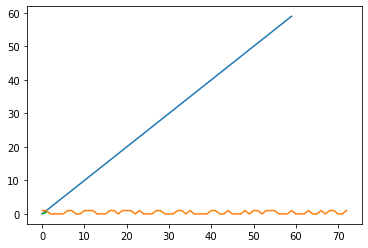

In [59]:
plt.plot(x)
plt.plot(y)
plt.plot(z)

In [ ]:
y

In [ ]:
for ix in range(1,(df['sess_chng']).max()):
    plt.figure()
    random_session = df[df['sess_chng']==ix]
    random_session = random_session[random_session['cont_num']==1]
    x = random_session.rewarded_at_a.rolling(10, min_periods=1).mean()
    y= random_session.rewarded_at_b.rolling(10, min_periods=1).mean()
    z= random_session.rewarded_at_c.rolling(10, min_periods=1).mean()
    plt.plot(x)
    plt.plot(y)
    plt.plot(z)
    plt.vlines((random_session[random_session['stem_switch']==1].index),0,1,colors='red', ls='--',alpha=0.5)



In [ ]:
random_session[random_session['stem_switch']==1].index

In [61]:
#calculates average mean for every contingency
mean_all=[]
for ix in range(1,(df['sess_chng']).max()):
#     plt.figure()
    random_session = df[df['sess_chng']==ix]
    random_session = random_session[random_session['cont_num']==1]
    x = random_session.meanA.mean()
    y= random_session.meanB.mean()
    z= random_session.meanC.mean()
    mean_all.append(statistics.mean([x,y,z]))
   


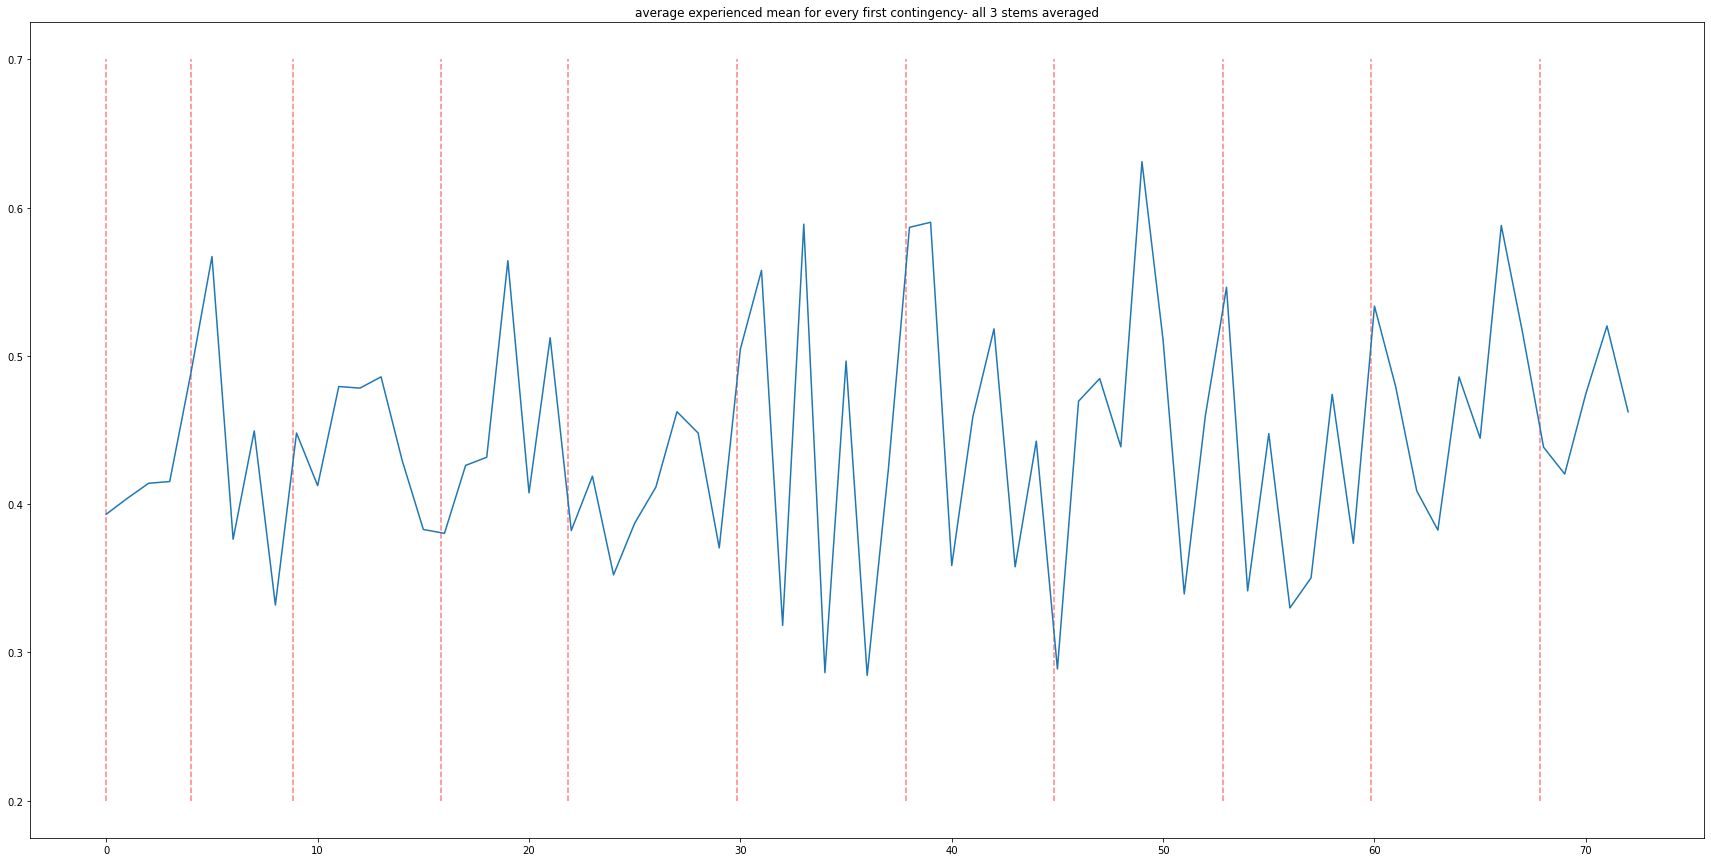

In [62]:
#and plots it. 
plt.figure(figsize=(30,15))
plt.plot(mean_all)
plt.title('average experienced mean for every first contingency- all 3 stems averaged')
plt.vlines((df[df['day_chng']].index)/180,0.2,.7,colors='red', ls='--',alpha=0.5)



